In [7]:
##############################
# Solves -u'' + u = f        #
# With zero Neumann boundary #
##############################
import radiant as rad
import numpy as np


# Problem Parameters
a = 0.
b = 1.


def exact(*x):
    return np.prod(np.sin(np.asarray(x) * 2 * np.pi / (b - a)), axis=0)


def f(*x):
    return (len(x) * (2 * np.pi / (b - a)) ** 2 + 1) * exact(*x)


def g(*x):
    return np.zeros_like(x[0])

In [8]:
# Parameters
d = 1
k = 2
delta = 0.5
Ns = np.arange(100, 2000, 100, dtype=int)

# Computed Parameters
ranges = ((a, b),) * d

idx_funcs = [
    lambda cs: np.all([np.logical_and(c != a, c != b) for c in cs], axis=0),
    lambda cs: np.any([np.logical_or(c == a, c == b) for c in cs], axis=0),
]
operators = [
    lambda func: lambda *x: - func.laplacian(*x) + func(*x),
    lambda func: lambda *x: func(*x),
]

# Integration
# integrator = rad.integrate.MeanIntegrator(ranges, 2000)
error_integrator = rad.integrate.QuadIntegrator(ranges)

# Data collection
results = np.zeros((np.size(Ns), 3))

for i, N in enumerate(Ns):
    xc = rad.gridn(ranges, N, flat=True)

    # Solve for approximate solution
    phi = rad.Wendland(d, k, delta, xc)
    # solver = rad.solve.GalerkinSolver(phi, integrator, "helmholtz")
    solver = rad.solve.CollocationSolver(phi, operators, idx_funcs)
    # approx = solver.solve(f)
    approx = solver.solve(f, g)
    error = rad.error(exact, approx, error_integrator)
    cond = solver.cond()
    bw = np.max(solver.bandwidth())
    
    results[i,0] = error 
    results[i, 1] = cond
    results[i, 2] = bw
    
    print("N:", N)
    print("  L2 Relative Error:", error)
    print("  Condition Number:", cond)
    print("  Bandwidth:", bw)

N: 100
  L2 Relative Error: 0.09612673366519726
  Condition Number: 10855.941750577644
  Bandwidth: 49
N: 200
  L2 Relative Error: 0.04054321523742072
  Condition Number: 63627.6780547189
  Bandwidth: 99
N: 300
  L2 Relative Error: 0.14169771951015206
  Condition Number: 202401.3225417478
  Bandwidth: 149
N: 400
  L2 Relative Error: 0.25268370829067527
  Condition Number: 906952.8974211809
  Bandwidth: 199
N: 500
  L2 Relative Error: 0.01765596289343071
  Condition Number: 65833.32162411409
  Bandwidth: 249
N: 600
  L2 Relative Error: 0.013017327187009141
  Condition Number: 199237.02650438173
  Bandwidth: 299
N: 700
  L2 Relative Error: 0.015072330685779883
  Condition Number: 176813.43700685943
  Bandwidth: 349
N: 800
  L2 Relative Error: 0.014597859190107289
  Condition Number: 4228377.37394314
  Bandwidth: 399
N: 900
  L2 Relative Error: 0.008482789244040981
  Condition Number: 153180.31356712186
  Bandwidth: 449
N: 1000
  L2 Relative Error: 0.005502603797835614
  Condition Number:

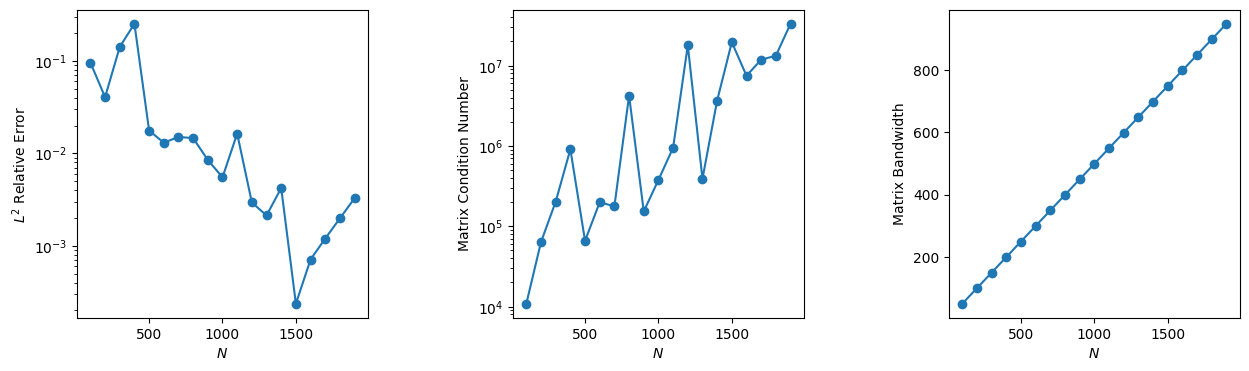

In [9]:
import matplotlib.pyplot as plt


fig, axs = plt.subplots(1, 3, figsize=(15,4))

axs[0].set_xlabel("$N$")
axs[0].set_ylabel(r"$L^{2}$ Relative Error")
axs[0].set_yscale('log')
axs[0].plot(Ns, results[:, 0], 'o-')

axs[1].set_xlabel("$N$")
axs[1].set_ylabel("Matrix Condition Number")
axs[1].set_yscale('log')
axs[1].plot(Ns, results[:, 1], 'o-')

axs[2].set_xlabel("$N$")
axs[2].set_ylabel("Matrix Bandwidth")
axs[2].plot(Ns, results[:, 2], 'o-')

plt.subplots_adjust(wspace=0.5)
plt.savefig("figures/kansa-centres.pdf")

In [10]:
np.shape(results)

(19, 3)